# Tables of content

### A-) Gathering
### B-) Assessing
- B-1-)Archived enhanced data
- B-1.1-)Quality Issues
- B-1.2-) Tidiness Issues

- B-2-) Image Predictions Data
- B-2.1-) Quality Issues
- B-2.2-)Tidiness Issues

- B-3-) Json Twitter API Data
- B-3.1-) Quality Issues
- B-3.2-) Tidiness Issues

### C-) Cleaning
### D-) Storing
### E-) Analysis and Visualizations

## *Let's import our library first

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
import requests 
import os
import json
import datetime
from PIL import Image, ImageDraw
sns.set_style('darkgrid')

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

# A-) Gathering

In [2]:
#Reading the manually downloaded twitter_archive_enhanced.csv file.
#Using read_csv function
df_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#Programmaticaly downloading the neural network files from Udacity's server 
#Using the following URL:https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
with open(os.path.join(url.split('/')[-1]),mode='wb') as file :
    file.write(r.content)

In [4]:
#Reading image-predictions.tsv
df_pred = pd.read_csv('image-predictions.tsv','\t')

In [5]:
#Reading tweet-json.txt file extracted from api
with open('tweet-json.txt') as file :
    df_json = pd.read_json(file,lines=True,encoding='utf-8')

In [6]:
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [7]:
df_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [8]:
df_json.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,place,possibly_sensitive,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}",39467,False,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,892420643555336193,892420643555336192,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Ratings | STORE: @ShopWeRateDogs | IG, FB & SC: WeRateDogs MOBILE APP: @GoodDogsGame | Business: dogratingtwitter@gmail.com', 'url': 'https://t.co/N7sNNHAEXS', 'entities': {'url': {'urls': [{'url': 'https://t.co/N7sNNHAEXS', 'expanded_url': 'http://weratedogs.com', 'display_url': 'weratedogs.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 3200889, 'friends_count': 104, 'listed_count': 2784, 'created_at': 'Sun Nov 15 21:41:29 +0000 2015', 'favourites_count': 114031, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 5288, 'lang': 'en', 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': '000000', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_tile': False, 'profile_image_url': 'http://pbs.twimg.com/profile_images/861415328504569856/R2xOOfwe_normal.jpg', 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/861415328504569856/R2xOOfwe_normal.jpg', 'profile_banner_url': 'https://pbs.twimg.com/profile_banners/4196983835/1501129017', 'profile_link_color': 'F5ABB5', 'profile_sidebar_border_color': '000000', 'profile_sidebar_fill_color': '000000', 'profile_text_color': '000000', 'profile_use_background_image': False, 'has_extended_profile': True, 'default_profile': False, 'default_profile_image': False, 'following': True, 'follow_request_sent': False, 'notifications': False, 'translator_type': 'none'}"
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 

# B-) Assessing

## B-1-)Archived enhanced data

In [9]:
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [10]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
df_archive.source.head(2)

0    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
1    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
Name: source, dtype: object

In [12]:
df_archive.source.unique()

array([ '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'], dtype=object)

In [13]:
df_archive.text[0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

In [14]:
df_archive.text[64]

'@RealKentMurphy 14/10 confirmed'

In [15]:
df_archive.text[30]

'@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution'

In [16]:
df_archive.text[189]

'@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10'

In [17]:
df_archive.text[188]

'@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research'

In [18]:
df_archive.text[342]

'@docmisterio account started on 11/15/15'

In [19]:
df_archive.rating_numerator.sort_values(ascending=False)

979     1776
313     960 
189     666 
188     420 
2074    420 
1120    204 
290     182 
902     165 
1779    144 
1634    143 
1635    121 
1228    99  
1843    88  
433     84  
1254    80  
695     75  
340     75  
1351    60  
1202    50  
1274    45  
1433    44  
763     27  
1712    26  
516     24  
1663    20  
55      17  
285     15  
291     15  
83      14  
866     14  
        ..  
2183    3   
1314    3   
1928    3   
765     3   
2202    3   
1692    3   
1478    3   
1898    3   
1249    3   
2305    3   
2079    2   
2326    2   
2349    2   
2237    2   
2246    2   
1920    2   
1761    2   
2310    2   
1764    2   
1940    1   
2038    1   
2091    1   
1869    1   
1446    1   
605     1   
2338    1   
2261    1   
2335    1   
1016    0   
315     0   
Name: rating_numerator, Length: 2356, dtype: int64

In [20]:
df_archive.text[2074]

'After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY'

In [21]:
df_archive.name[2074]

'None'

In [22]:
df_archive.expanded_urls.sort_values()

1265    http://goo.gl/ArWZfi,https://twitter.com/dog_rates/status/709901256215666688/photo/1,https://twitter.com/dog_rates/status/709901256215666688/photo/1,https://twitter.com/dog_rates/status/709901256215666688/photo/1,https://twitter.com/dog_rates/status/709901256215666688/photo/1                                                                                                                                                                    
444     http://us.blastingnews.com/news/2017/01/200-dogs-saved-from-south-korean-dog-meat-industry-001385441.html?sbdht=_pM1QUzk3wsfscF9XF2WEd9KoWDpsQlMUjfh1HxxUq0u5mMbiu2B0kw2_                                                                                                                                                                                                                                                                               
391     http://us.blastingnews.com/news/2017/01/kentucky-teen-helps-lost-yellow-labrador-and-gets-a-hu

In [23]:
df_archive[df_archive.name.str.islower()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139158093824/video/1,14,10,such,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004380872706/video/1,14,10,a,None,None,pupper,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10…,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978902773760/video/1,12,10,quite,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978902773760/video/1,12,10,quite,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/855459453768019968/photo/1,https://twitter.com/dog_rates/status/855459453768019968/photo/1",12,10,quite,None,None,None,None
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",There's going to be a dog terminal at JFK Airport. This is not a drill. 10/10 \nhttps://t.co/dp5h9bCwU7,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/02/jfk-announces-its-first-ever-ark-oasis-animal-terminal-001480161.html?sbdht=_pM1QUzk3wsdTxcmMoRPV7FWYYlsNKcFRcYSY7OmeHnOXA4NtUM6PLQ2_,10,10,not,None,None,None,None
369,828650029636317184,NaN,NaN,2017-02-06 17:02:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/828650029636317184/photo/1,https://twitter.com/dog_rates/status/828650029636317184/photo/1,https://twitter.com/dog_rates/status/828650029636317184/photo/1",14,10,one,None,None,None,None
542,806219024703037440,NaN,NaN,2016-12-06 19:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs. Please stop sending in non-canines like this Freudian Poof Lion. This is incredibly frustrating... 11/10 https://t.co/IZidSrBvhi,NaN,NaN,NaN,https://twitter.com/dog_rates/status/806219024703037440/photo/1,11,10,incredibly,None,None,None,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,NaN,NaN,NaN,"https://twitter.com/dog

In [24]:
df_dog_names = df_archive[df_archive.name.str.islower()]
df_dog_names = df_dog_names.name.unique()

In [25]:
df_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

In [26]:
df_archive.rating_numerator.describe()

count    2356.000000
mean     13.126486  
std      45.876648  
min      0.000000   
25%      10.000000  
50%      11.000000  
75%      12.000000  
max      1776.000000
Name: rating_numerator, dtype: float64

In [27]:
df_archive.query("rating_numerator <= 5" ).loc[:1000]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5,10,Bella,None,None,None,None
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1",0,10,None,None,None,None,None
605,798576900688019456,NaN,NaN,2016-11-15 17:22:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/…,6.661041e+17,4.196984e+09,2015-11-16 04:02:55 +0000,https://twitter.com/dog_rates/status/666104133288665088/photo/1,1,10,None,None,None,None,None
730,781661882474196992,NaN,NaN,2016-09-30 01:08:10 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Who keeps sending in pictures without dogs in them? This needs to stop. 5/10 for the mediocre road https://t.co/ELqelxWMrC,NaN,NaN,NaN,https://twitter.com/dog_rates/status/781661882474196992/photo/1,5,10,None,None,None,None,None
765,777885040357281792,NaN,NaN,2016-09-19 15:00:20 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Wesley. He's clearly trespassing. Seems rather h*ckin violent too. Weaponized forehead. 3/10 wouldn't let in https://t.co/pL7wbMRW7M,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/777885040357281792/photo/1,https://twitter.com/dog_rates/status/777885040357281792/photo/1",3,10,Wesley,None,None,None,None
883,760252756032651264,NaN,NaN,2016-08-01 23:15:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Fido. He can tell the weather. Not good at fetch tho. Never comes when called. 4/10 would probably still pet https://t.co/4gOv2Q3iKP,NaN,NaN,NaN,https://twitter.com/dog_rates/status/760252756032651264/photo/1,4,10,Fido,None,None,None,None
912,757596066325864448,NaN,NaN,2016-07-25 15:19:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's another picture without a dog in it. Idk why you guys keep sending these. 4/10 just because that's a neat rug https://t.co/mOmnL19Wsl,NaN,NaN,NaN,https://twitter.com/dog_rates/status/757596066325864448/photo/1,4,10,None,None,None,None,None
956,751583847268179968,NaN,NaN,2016-07-09 01:08:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751583847268179968/photo/1,5,10,None,doggo,None,pupper,None


In [28]:
df_archive.query("rating_numerator <= 5" ).loc[1000:2000]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857231626240/photo/1,4,10,a,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459439529985/photo/1,0,10,None,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,None,None,None,None
1189,718246886998687744,NaN,NaN,2016-04-08 01:19:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Alexanderson. He's got a weird ass birth mark. Dreadful at fetch. Won't eat kibble. 3/10 wtf @Target https://t.co/FmxOpf2Sgl,NaN,NaN,NaN,https://twitter.com/dog_rates/status/718246886998687744/photo/1,3,10,Alexanderson,None,None,None,None
1219,714631576617938945,NaN,NaN,2016-03-29 01:53:39 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Benedict. He's a feisty pup. Needs a brushing. Portable af. Looks very angry actually. 4/10 might not pet https://t.co/3oeFfHjv0Z,NaN,NaN,NaN,https://twitter.com/dog_rates/status/714631576617938945/photo/1,4,10,Benedict,None,None,None,None
1249,711306686208872448,NaN,NaN,2016-03-19 21:41:44 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",What hooligan sent in pictures w/out a dog in them? Churlish af. 3/10 just bc that's a neat fluffy bean bag chair https://t.co/wcwoGOkZvz,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/711306686208872448/photo/1,https://twitter.com/dog_rates/status/711306686208872448/photo/1",3,10,None,None,None,None,None
1303,707420581654872064,NaN,NaN,2016-03-09 04:19:44 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Keurig. He's a rare dog. Laughs like an idiot tho. Head is basically a weapon. Poorly maintained goatee 4/10 https://t.co/xOrUyj7K30,NaN,NaN,NaN,https://twitter.com/dog_rates/status/707420581654872064/photo/1,4,10,Keurig,None,None,None,None
1314,706901761596989440,NaN,NaN,2016-03-07 17:58:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Elliot. He's blocking the roadway. Downright rude as hell. Doesn't care that you're already late. 3/10 https://t.co/FMUxir5pYu,NaN,NaN,NaN,https://twitter.com/dog_rates/status/706901761596989440/photo/1,3,10,Elliot,None,None,None,None
1399,699691744225525762,NaN,NaN,2016-02-16 20:28:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Dave. He's a tropical pup. Short lil legs (dachshund mix?) Excels underwater, but refuses to eat kibble 5/10 https://t.co/ZJnCxlIf62",NaN,NaN,NaN,https://twitter.com/dog_rates/status/699691744225525762/photo/1,5,10,Dave,None,None,None,None
1406,699088579889332224,NaN,NaN,2016-02-15 04:31:20 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Charl. He's a bully. Chucks that dumbbell around like its nothing. Sharp neck. Exceptiona

In [29]:
df_archive.rating_denominator.describe()

count    2356.000000
mean     10.455433  
std      6.745237   
min      0.000000   
25%      10.000000  
50%      10.000000  
75%      10.000000  
max      170.000000 
Name: rating_denominator, dtype: float64

In [30]:
df_archive.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2])

In [31]:
df_archive.query("rating_denominator > 10").loc[0:1000]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,30582082.0,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None


In [32]:
df_archive.query("rating_denominator < 10").loc[0:1000]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None


### B-1.1-)Quality Issues

- In **df_archive** There is **745** (None) values and **55** (a) values as if it was np.nan .
- **None** values seems to be replacing NaN values in doggo , floofer , pupper , puppo when it's not available .
- In **df_archive** timestamp should be a **datetime** (data type) not a string .
- In **df_archive** *Source* Column it's an HTML code including the source inside it ex:>Twitter for iPhone< , >Twitter Web Client< , >Vine - Make a Scene< ,>TweetDeck< and converted to *categorical data type*
- In  **df_archive** the *text* column includes the link of the tweet
- In **df_archive** we only care about real rating form **weratedogs** ***no retweets*** 
- In **df_archive** index[2074] should be named snoop dogg.
- In **df_archive** There are a lot of values in name column that are not really a name saved in **df_dogs_names**. 
- In **df_archive** Atticus the highest rating with *1776* rating
- In **df_archive** index [45] should be 13.5 not 5
- In **df_archive** index [1165] it included the date 4/20 therefore the numerator(4) and the denomenator(20) are wrong instead should be 13/10.
- In **df_archive** index [313] the rating is 
- In **df_archive** index 315 and 1016 have 0 ratings
- In **df_archive** Certain Ratings have denominerators that are more the 10 , usually they are the number of dogs times 10
- In **df_archive** certain ratings are duplicated such snoop dogg reply (420 as a numerator).
- In **df_archive** a dog can't have many types ex: index[956]
- In **df_archive** doggo , floofer , pupper , puppo should be **categorical data**

### B-1.2-) Tidiness Issues

- In **df_archive** doggo , floofer , pupper , puppo are obesrvations that should be in the same column as a dog type variable column
- In **df_archive** Since we are concerned with the tweets only retweet columns should be dropped 

## B-2-) Image Predictions Data

In [33]:
df_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [34]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [35]:
df_pred.tweet_id.value_counts()

685532292383666176    1
826598365270007810    1
692158366030913536    1
714606013974974464    1
715696743237730304    1
776477788987613185    1
772114945936949249    1
699775878809702401    1
780858289093574656    1
700462010979500032    1
732726085725589504    1
738883359779196928    1
798644042770751489    1
743510151680958465    1
837012587749474308    1
833722901757046785    1
668620235289837568    1
842765311967449089    1
685315239903100929    1
673686845050527744    1
680473011644985345    1
666051853826850816    1
675853064436391936    1
693231807727280129    1
705475953783398401    1
829449946868879360    1
759923798737051648    1
667160273090932737    1
680934982542561280    1
743545585370791937    1
                     ..
794926597468000259    1
776113305656188928    1
825026590719483904    1
834209720923721728    1
775733305207554048    1
669564461267722241    1
879492040517615616    1
720775346191278080    1
666362758909284353    1
750506206503038976    1
6931556864910008

In [36]:
df_pred.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [37]:
df_pred.img_num.value_counts()

1    1780
2    198 
3    66  
4    31  
Name: img_num, dtype: int64

In [38]:
df_pred.img_num.value_counts().sum()

2075

In [39]:
df_pred['p1'].unique()

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher', 'Bernese_mountain_dog',
       'box_turtle', 'chow', 'shopping_cart', 'miniature_poodle',
       'golden_retriever', 'Gordon_setter', 'Walker_hound', 'pug',
       'bloodhound', 'Lhasa', 'English_setter', 'hen', 'desktop_computer',
       'Italian_greyhound', 'Maltese_dog', 'three-toed_sloth', 'ox',
       'malamute', 'guinea_pig', 'soft-coated_wheaten_terrier',
       'Chihuahua', 'black-and-tan_coonhound', 'coho', 'toy_terrier',
       'Blenheim_spaniel', 'Pembroke', 'llama', 'Chesapeake_Bay_retriever',
       'curly-coated_retriever', 'dalmatian', 'Ibizan_hound',
       'Border_collie', 'Labrador_retriever', 'seat_belt', 'snail',
       'miniature_schnauzer', 'Airedale', 'triceratops', 'swab', 'hay',
       'hyena', 'jigsaw_puzzle', 'West_Highland_white_terrier',
       'toy_poodle', 'giant_schnauzer', 'vizsla', 'vacuum', 'Rottweiler',
       'Siberian_husky', 'teddy', 

In [40]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [41]:
df_archive[df_archive.rating_numerator == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1",0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459439529985/photo/1,0,10,None,None,None,None,None


In [42]:
df_archive.tweet_id.value_counts()

749075273010798592    1
741099773336379392    1
798644042770751489    1
825120256414846976    1
769212283578875904    1
700462010979500032    1
780858289093574656    1
699775878809702401    1
880095782870896641    1
760521673607086080    1
776477788987613185    1
691820333922455552    1
715696743237730304    1
714606013974974464    1
760539183865880579    1
813157409116065792    1
676430933382295552    1
743510151680958465    1
837012587749474308    1
833722901757046785    1
818259473185828864    1
670704688707301377    1
667160273090932737    1
674394782723014656    1
672082170312290304    1
670093938074779648    1
759923798737051648    1
809920764300447744    1
805487436403003392    1
838085839343206401    1
                     ..
763956972077010945    1
870308999962521604    1
720775346191278080    1
785927819176054784    1
783347506784731136    1
775733305207554048    1
834209720923721728    1
825026590719483904    1
758405701903519748    1
668986018524233728    1
6909388994772213

In [43]:
df_archive.isnull().sum()

tweet_id                      0   
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                     0   
source                        0   
text                          0   
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                 59  
rating_numerator              0   
rating_denominator            0   
name                          0   
doggo                         0   
floofer                       0   
pupper                        0   
puppo                         0   
dtype: int64

### B-2.1-) Quality Issues

- In **df_pred** Dogs should be categorical data after they are gathered in one column.

### B-2-2-)Tidiness Isuues

- In **df_pred** The p1 , p2 , p3 should all be gathered in one column according the prediction Truth by order and they should be converted to be categorical data
- In **df_pred** we only need 4 columns tweet_id , jpg_url , img_num , dog_category

## B-3-) Json Twitter API Data

In [44]:
df_json.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,place,possibly_sensitive,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}",39467,False,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,892420643555336193,892420643555336192,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Ratings | STORE: @ShopWeRateDogs | IG, FB & SC: WeRateDogs MOBILE APP: @GoodDogsGame | Business: dogratingtwitter@gmail.com', 'url': 'https://t.co/N7sNNHAEXS', 'entities': {'url': {'urls': [{'url': 'https://t.co/N7sNNHAEXS', 'expanded_url': 'http://weratedogs.com', 'display_url': 'weratedogs.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 3200889, 'friends_count': 104, 'listed_count': 2784, 'created_at': 'Sun Nov 15 21:41:29 +0000 2015', 'favourites_count': 114031, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 5288, 'lang': 'en', 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': '000000', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_tile': False, 'profile_image_url': 'http://pbs.twimg.com/profile_images/861415328504569856/R2xOOfwe_normal.jpg', 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/861415328504569856/R2xOOfwe_normal.jpg', 'profile_banner_url': 'https://pbs.twimg.com/profile_banners/4196983835/1501129017', 'profile_link_color': 'F5ABB5', 'profile_sidebar_border_color': '000000', 'profile_sidebar_fill_color': '000000', 'profile_text_color': '000000', 'profile_use_background_image': False, 'has_extended_profile': True, 'default_profile': False, 'default_profile_image': False, 'following': True, 'follow_request_sent': False, 'notifications': False, 'translator_type': 'none'}"
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 

In [45]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [46]:
df_archive.query('tweet_id == 892420643555336193')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None


In [47]:
df_json.query('id == 892420643555336193')

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,place,possibly_sensitive,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}",39467,False,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,892420643555336193,892420643555336192,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Ratings | STORE: @ShopWeRateDogs | IG, FB & SC: WeRateDogs MOBILE APP: @GoodDogsGame | Business: dogratingtwitter@gmail.com', 'url': 'https://t.co/N7sNNHAEXS', 'entities': {'url': {'urls': [{'url': 'https://t.co/N7sNNHAEXS', 'expanded_url': 'http://weratedogs.com', 'display_url': 'weratedogs.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 3200889, 'friends_count': 104, 'listed_count': 2784, 'created_at': 'Sun Nov 15 21:41:29 +0000 2015', 'favourites_count': 114031, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 5288, 'lang': 'en', 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': '000000', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_tile': False, 'profile_image_url': 'http://pbs.twimg.com/profile_images/861415328504569856/R2xOOfwe_normal.jpg', 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/861415328504569856/R2xOOfwe_normal.jpg', 'profile_banner_url': 'https://pbs.twimg.com/profile_banners/4196983835/1501129017', 'profile_link_color': 'F5ABB5', 'profile_sidebar_border_color': '000000', 'profile_sidebar_fill_color': '000000', 'profile_text_color': '000000', 'profile_use_background_image': False, 'has_extended_profile': True, 'default_profile': False, 'default_profile_image': False, 'following': True, 'follow_request_sent': False, 'notifications': False, 'translator_type': 'none'}"


In [48]:
df_json.query("lang == 'in'")

contributors  coordinates          created_at display_text_range  \
164  NaN           NaN          2017-05-04 17:01:34  [0, 140]            
868  NaN           NaN          2016-08-05 21:19:27  [0, 112]            
1664 NaN           NaN          2015-12-31 22:57:47  [0, 67]             

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 entities  \
164   {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'dog_rates', 'name': 'WeRateDogs™ (author)', 'id': 4196983835, 'id_str': '4196983835', 'indices': [3, 13]}], 'urls': []}                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
868   {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 761672828462718981, 'id_str': '761672828462718981', 'indices': [113, 136], 'media_url': 'http://pbs.twimg.com/ext_tw_video_thumb/761672828462718981/pu/img/R00UYAAWB3GtuHdI.jpg', 'media_url_https': 'https://pbs.twimg.com/ext_tw_video_thumb/761672828462718981/pu/img/R00UYAAWB3GtuHdI.jpg', 'url': 'https://t.co/EY8kEFuzK7', 'display_url': 'pic.twitter.com/EY8kEFuzK7', 'expanded_url': 'https://twitter.com/dog_rates/status/761672994376806400/video/1', 'type': 'photo', 'sizes': {'small': {'w': 340, 'h': 340, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 600, 'h': 600, 'resize': 'fit'}, 'large': {'w': 720, 'h': 720, 'resize': 'fit'}}}]}   
1664  {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 682697175697088514, 'id_str': '682697175697088514', 'indices': [44, 67], 'media_url': 'http://pbs.twimg.com/media/CXltdtaWYAIuX_V.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CXltdtaWYAIuX_V.jpg', 'url': 'https://t.co/Ny4iM6FDtz', 'display_url': 'pic.twitter.com/Ny4iM6FDtz', 'expanded_url': 'https://twitter.com/dog_rates/status/682697186228989953/photo/1', 'type': 'photo', 'sizes': {'small': {'w': 340, 'h': 227, 'resize': 'fit'}, 'large': {'w': 960, 'h': 640, 'resize': 'fit'}, 'medium': {'w': 600, 'h': 400, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}}}]}                                                                                     

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [49]:
df_json.id.value_counts()

749075273010798592    1
741099773336379392    1
798644042770751489    1
825120256414846976    1
769212283578875904    1
700462010979500032    1
780858289093574656    1
699775878809702401    1
880095782870896641    1
760521673607086080    1
776477788987613185    1
691820333922455552    1
715696743237730304    1
714606013974974464    1
760539183865880579    1
813157409116065792    1
676430933382295552    1
743510151680958465    1
837012587749474308    1
833722901757046785    1
818259473185828864    1
670704688707301377    1
667160273090932737    1
674394782723014656    1
672082170312290304    1
670093938074779648    1
759923798737051648    1
809920764300447744    1
805487436403003392    1
838085839343206401    1
                     ..
720775346191278080    1
879492040517615616    1
785927819176054784    1
834209720923721728    1
857062103051644929    1
825026590719483904    1
758405701903519748    1
668986018524233728    1
690938899477221376    1
678800283649069056    1
6815798356684554

In [50]:
df_json.lang.value_counts()

en     2336
und    7   
in     3   
nl     3   
ro     1   
eu     1   
tl     1   
es     1   
et     1   
Name: lang, dtype: int64

### B-3.1-) Quality Issues

### B-3.2-) Tidiness Issues

- In **df_pred** we only need retweet_count ,favorite_count
- **df_json** should join **df_archive** to make a full table of data execluding the image data set made in **df_pred**

# B-4-)Total Assesment

## Quality Issues

- ***DONE*** In **df_archive** There is **745** (None) values and **55** (a) values as if it was np.nan .
- ***DONE*** In **df_archive** **None** values seems to be replacing NaN values in doggo , flooger , pupper , puppo when it's not available .
- ***DONE*** In **df_archive** timestamp should be a **datetime** (data type) not a string .
- ***DONE*** In **df_archive** *Source* Column it's an HTML code including the source inside it ex:>Twitter for iPhone< , >Twitter Web Client< , >Vine - Make a Scene< ,>TweetDeck< and converted to *categorical data type*
- ***DONE*** In  **df_archive** the *text* column includes the link of the tweet
- ***DONE*** In **df_archive** we only care about real rating from **weratedogs** ***no retweets*** 
- ***DONE*** In **df_archive** index[2074] should be named snoop dogg.
- ***DONE*** In **df_archive** There are a lot of values in name column that are not really a name saved in **df_dogs_names**. 
- ***DONE*** In **df_archive** index [45] should be 13.5 not 5
- ***DONE*** In **df_archive** index [313] the rating is 960
- ***DONE*** In **df_archive** index 315 and 1016 have 0 ratings
- ***DONE*** In **df_archive** index [1165] it included the date 4/20 therefore the numerator(4) and the denomenator(20) are wrong instead should be 13/10.
- ***DONE*** In **df_archive** Certain Ratings have denominerators that are more the 10 , usually they are the number of dogs times (10).
- ***DONE*** In **df_archive** certain ratings are duplicated such snoop dogg reply (420 as a numerator)
- ***DONE*** In **df_archive** doggo , floofer , pupper , puppo should be **categorical data**

### Additional Quality Issues discoverd after cleaning
- ***DONE*** Drop index[516] because it includes no value.
- ***DONE*** Fix index[259] 13/10 not 2.4.
- ***DONE*** Fix index[1294] 12/10 not 4.3.
- ***DONE*** Fix index[1768] 11/10 not 92.49.
- ***DONE*** Fix index[2347] 9/10 not 8.98.
- ***DONE*** Fix index[1790] 9/10 not 5.7.
- ***DONE*** Index [342] ,[1663] , and [1598] replies and dates , should be dropped.
- ***DONE*** Index [1068] >>> should be 14/10 not date.
- ***DONE*** Index [1165] >>> denominator should be 10 not 20.
- ***DONE*** Index [1202] >>> denominator should be 10 not 50.
- ***DONE*** Index [1662] >>> should be 10/10.
- ***DONE*** denominators less than 10 .

## Tidiness Issues

- ***DONE*** Remove unnecessary columns in df_archive
- ***DONE*** In **df_archive** doggo , floofer , pupper , puppo are obesrvations that should be in the same column as a dog type variable column
- ***DONE*** In **df_archive** Since we are concerned with the tweets only retweet columns and reply should be dropped 
- ***DONE*** In **df_pred** The p1 , p2 , p3 should all be gathered in one column according the prediction Truth and confidence by order and they should be converted to be categorical data
- ***DONE*** In **df_pred** we only need 5 columns tweet-id , jpg_url , img_num , breed , confidence_per 
- ***DONE*** In **df_json** we only need retweet_count ,favorite_count
- ***DONE*** **df_json** & **df_pred** should join **df_archive** to represent the data in one table

# C-) Cleaning

In [51]:
# Copying the master dataframes to the dataframes that are going to be cleaned 
# analyzed and visualized later on.
archive_clean = df_archive.copy()
pred_clean = df_pred.copy()
api_clean = df_json.copy()

### Define

- Replace *None* values and *a* values with **np.nan**

### Code

In [52]:
archive_clean.name.value_counts()

None         745
a            55 
Charlie      12 
Cooper       11 
Oliver       11 
Lucy         11 
Penny        10 
Lola         10 
Tucker       10 
Winston      9  
Bo           9  
the          8  
Sadie        8  
Toby         7  
an           7  
Bailey       7  
Buddy        7  
Daisy        7  
Jax          6  
Dave         6  
Oscar        6  
Milo         6  
Leo          6  
Scout        6  
Rusty        6  
Jack         6  
Bella        6  
Koda         6  
Stanley      6  
Gus          5  
            ..  
Sweets       1  
Jay          1  
Sandra       1  
Dietrich     1  
Grey         1  
Yukon        1  
Dido         1  
Bubba        1  
Bobble       1  
Ralphie      1  
Tito         1  
William      1  
Nida         1  
Baron        1  
Kellogg      1  
Rodman       1  
Jebberson    1  
Shikha       1  
Brutus       1  
Lorelei      1  
Kirk         1  
Monkey       1  
Gustav       1  
Cora         1  
Glenn        1  
Gerbald      1  
Charl        1  
Bode         1

In [53]:
archive_clean.name.replace(["None","a"],np.nan,inplace=True)

### Test

In [54]:
archive_clean.name.value_counts()

Charlie      12
Cooper       11
Lucy         11
Oliver       11
Tucker       10
Penny        10
Lola         10
Bo           9 
Winston      9 
Sadie        8 
the          8 
Buddy        7 
Toby         7 
Bailey       7 
Daisy        7 
an           7 
Leo          6 
Jack         6 
Rusty        6 
Oscar        6 
Scout        6 
Koda         6 
Bella        6 
Milo         6 
Stanley      6 
Dave         6 
Jax          6 
Sammy        5 
Phil         5 
Louis        5 
            .. 
Rilo         1 
Loomis       1 
Fillup       1 
Marvin       1 
Crawford     1 
Nigel        1 
Jennifur     1 
Buckley      1 
Tanner       1 
Ozzie        1 
Bloop        1 
Hubertson    1 
his          1 
Clifford     1 
Major        1 
Gustaf       1 
Thor         1 
Bruno        1 
Furzey       1 
Wesley       1 
Lucia        1 
Rumpole      1 
Donny        1 
Aubie        1 
Freddery     1 
Claude       1 
Schnitzel    1 
Goliath      1 
Jeffri       1 
Sid          1 
Name: name, Length: 955,

### Define

- Replace **None** values in doggo , flooger , pupper , puppo columns with np.nan

### Code

In [55]:
archive_clean[['doggo','floofer','pupper','puppo']]=archive_clean[['doggo','floofer','pupper','puppo']].replace(['None'],np.nan)

### Test



In [56]:
archive_clean[['doggo','floofer','pupper','puppo']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 4 columns):
doggo      97 non-null object
floofer    10 non-null object
pupper     257 non-null object
puppo      30 non-null object
dtypes: object(4)
memory usage: 73.7+ KB


In [57]:
archive_clean[['doggo','floofer','pupper','puppo']].isnull().sum()

doggo      2259
floofer    2346
pupper     2099
puppo      2326
dtype: int64

### Define

- Change timestamp ***Datatype*** in **df_archive** form object to datetime.

### Code 

In [58]:
archive_clean.timestamp = archive_clean.timestamp.astype('datetime64[ns]')

### Test

In [59]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1556 non-null object
doggo                         97 non-null object
floofer                       10 non-null object
pupper                        257 non-null object
puppo                         30 non-null object
dtypes: datetime64[ns](1), floa

### Define

- Extract values from ***Source*** column in **df_archive** 
ex:>Twitter for iPhone< , >Twitter Web Client< , >Vine - Make a Scene< ,>TweetDeck< and converted to *categorical data type*

### Code

In [60]:
archive_clean.source.unique()

array([ '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'], dtype=object)

In [61]:
archive_clean.source = archive_clean.source.str.extract('\>(\D*)\<')

In [62]:
#Replaced any space with underscore , So we can access any category easily.
archive_clean.source = archive_clean.source.str.replace(" ","_")

In [63]:
#Changed the datatype from Oject to Category
archive_clean.source = archive_clean.source.astype('category')

### Test

In [64]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null category
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1556 non-null object
doggo                         97 non-null object
floofer                       10 non-null object
pupper                        257 non-null object
puppo                         30 non-null object
dtypes: category(1), datetime

In [65]:
archive_clean.source.unique()

[Twitter_for_iPhone, Twitter_Web_Client, Vine_-_Make_a_Scene, TweetDeck]
Categories (4, object): [Twitter_for_iPhone, Twitter_Web_Client, Vine_-_Make_a_Scene, TweetDeck]

### Define

- Extract the text only from **df_archive** through the *text* column and include the link of the tweet in another column 

### Code 

In [66]:
# Understanding the tweet links pattern
archive_clean.text[0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

In [67]:
# Understanding the tweet links pattern
archive_clean.text[0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

In [68]:
# Understanding the tweet links pattern
archive_clean.text[1]

"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV"

In [69]:
#Creating a new column to contain the tweet links 
archive_clean['tweet_link'] = archive_clean.text.str.extract('(\D{5}\:\/+\D*\.\D*?\/?\D*?\d*\D*\d*\D*\d*\D*.*)')

In [70]:
#Removing the tweet links from text
archive_clean['text'] = archive_clean['text'].str.replace('(\D{5}\:\/+\D*\.\D*?\/?\D*?\d*\D*\d*\D*\d*\D*.*)','')

### Test

In [71]:
#Tweet links look good
archive_clean.tweet_link.head()

0    https://t.co/MgUWQ76dJU
1    https://t.co/0Xxu71qeIV
2    https://t.co/wUnZnhtVJB
3    https://t.co/tD36da7qLQ
4    https://t.co/AtUZn91f7f
Name: tweet_link, dtype: object

In [72]:
#Once again they look valid
archive_clean.tweet_link.tail()

2351    https://t.co/4B7cOc1EDq
2352    https://t.co/DWnyCjf2mx
2353    https://t.co/y671yMhoiR
2354    https://t.co/r7mOb2m0UI
2355    https://t.co/BLDqew2Ijj
Name: tweet_link, dtype: object

In [73]:
#Once again the text is separated and looks good
archive_clean.text.sample(5)

1950    Meet Larry. He doesn't know how to shoe. 9/10 damn it Larry                                                              
1159    This is Sarge. Not even he knows what his tongue is doing, but it's pretty damn spectacular. 10/10                       
847     RT @dog_rates: This is Colby. He's currently regretting all those times he shook your hand for an extra treat. 12/10     
1317    Here's a sneak peek of me on spring break. 10/10 so many tired pups these days                                           
889     Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time 
Name: text, dtype: object

In [74]:
#Didn't the regex detect the missing tweet-links ?
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null category
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1556 non-null object
doggo                         97 non-null object
floofer                       10 non-null object
pupper                        257 non-null object
puppo                         30 non-null object
tweet_link                   

In [75]:
#Didn't the regex detect the missing tweet-links ?
archive_clean.tweet_link.isnull()[30:60]

30    True 
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
51    False
52    False
53    False
54    False
55    True 
56    False
57    False
58    False
59    False
Name: tweet_link, dtype: bool

In [76]:
# lets' check tweet index [30] and [55] from the master file
print(df_archive.text[30])
print(df_archive.text[55])
#It looks they didn't include the tweet links in there.

@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution
@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s


### Define

- Filter the table from rows that contains retweets in **df_archive** since we only care about real rating form **weratedogs** ***not retweets*** 
- Drop Retweet related columns

### Code

In [77]:
archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'tweet_link'],
      dtype='object')

In [78]:
#filled the np.nan values to query it later.
archive_clean.retweeted_status_timestamp.fillna("none",inplace=True)


In [79]:
#Filtered the table so we can use the tweets or replies only
archive_clean = archive_clean[archive_clean.retweeted_status_timestamp == 'none']

In [80]:
#let's Drop the retweet columns since it's out of pur scope
archive_clean = archive_clean.drop(["retweeted_status_timestamp","retweeted_status_id","retweeted_status_user_id"] , axis = 1)

### Test

In [81]:
archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,tweet_link
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter_for_iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN,NaN,NaN,NaN,https://t.co/MgUWQ76dJU
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter_for_iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN,NaN,NaN,NaN,https://t.co/0Xxu71qeIV
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter_for_iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN,NaN,NaN,NaN,https://t.co/wUnZnhtVJB
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter_for_iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN,NaN,NaN,NaN,https://t.co/tD36da7qLQ
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter_for_iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,NaN,NaN,NaN,NaN,https://t.co/AtUZn91f7f
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,Twitter_for_iPhone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,NaN,NaN,NaN,NaN,NaN,https://t.co/kQ04fDDRmh
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,Twitter_for_iPhone,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\n,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,NaN,NaN,NaN,NaN,https://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,Twitter_for_iPhone,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,NaN,NaN,NaN,NaN,NaN,https://t.co/v0nONBcwxq
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,Twitter_for_iPhone,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,NaN,NaN,NaN,NaN,https://t.co/9TwLuAGH0b
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,Twitter_for_iPhone,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate,https://twitter.com/dog_rates/status/890240255349198849/photo/1,14,10,Cassie,doggo,NaN,NaN,NaN,https://t.co/t1bfwz5S2A


In [82]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null category
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     1440 non-null object
doggo                    87 non-null object
floofer                  10 non-null object
pupper                   234 non-null object
puppo                    25 non-null object
tweet_link               2117 non-null object
dtypes: category(1), datetime64[ns](1), float64(2), int64(3), object(8)
memory usage: 257.2+ KB


### Define

- Replace the name in  **df_archive** index[2074] to snoop dogg.
- Replace or remove the names in the **df_dogs_names list** made of the **df_archive**.

### Code

In [83]:
#Let's give this dog a name and it's the REAL SNOOP DOGG!.
archive_clean.name.loc[2074] = "Snoop Dogg"

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [84]:
df_dog_names 

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
       'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

In [85]:
df_dog_names.astype("str")

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
       'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], 
      dtype='<U12')

In [86]:
for dog_name in df_dog_names :
    archive_clean.name = archive_clean.name.replace(dog_name, np.nan)

### Test

In [87]:
#We can't see any values from the df_dog_names
archive_clean.name.value_counts()

Charlie      11
Lucy         11
Oliver       10
Cooper       10
Tucker       9 
Penny        9 
Sadie        8 
Winston      8 
Lola         8 
Daisy        7 
Toby         7 
Jax          6 
Stanley      6 
Bo           6 
Bella        6 
Koda         6 
Bailey       6 
Oscar        6 
Leo          5 
Rusty        5 
Dave         5 
Milo         5 
Buddy        5 
Scout        5 
Chester      5 
Louis        5 
Bentley      5 
Sammy        4 
Alfie        4 
Phil         4 
            .. 
Stewie       1 
Skittles     1 
Bauer        1 
Wiggles      1 
Claude       1 
Aubie        1 
Snicku       1 
Al           1 
Alf          1 
Tess         1 
Willie       1 
Pinot        1 
Cali         1 
Ozzie        1 
Bloop        1 
Hubertson    1 
Clarq        1 
Hector       1 
Schnozz      1 
Gustaf       1 
Thor         1 
Bruno        1 
Jonah        1 
Tanner       1 
Furzey       1 
Ralphus      1 
Jo           1 
Rumpole      1 
Donny        1 
Sid          1 
Name: name, Length: 931,

In [88]:
#here is an specefic example for that.
archive_clean.query("name == 'an'")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,tweet_link


### Define

- Adding the ratings with decimal ratings by extracting them again with regex.
- Change the numerator and denominator datatype to float 
- ***Check the following problems after coding***
- In **df_archive** index [45] should be 13.5 not 5
- In **df_archive** index [313] the rating is 960 instead of 13
- In **df_archive** index 315 and 1016 have 0 ratings
- Dates are extracted instead of ratings ex : index[1163]

In [89]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null category
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     1392 non-null object
doggo                    87 non-null object
floofer                  10 non-null object
pupper                   234 non-null object
puppo                    25 non-null object
tweet_link               2117 non-null object
dtypes: category(1), datetime64[ns](1), float64(2), int64(3), object(8)
memory usage: 337.2+ KB


### Code

In [90]:
#Changing the rating numerator and denominator datatype into floats so we can add the decimal values 
#when they are extracted later.
archive_clean.rating_numerator = archive_clean.rating_numerator.astype(float)
archive_clean.rating_denominator = archive_clean.rating_denominator.astype(float)

In [91]:
#Extracting some of the numerator ratings again using regex
new_ratings = archive_clean.text.str.extract('\D?\W+?\+?\s+?\.?(\w*?\.?\d+)\/[^0][0-9]')
new_ratings

,0
0,13
1,13
2,12
3,13
4,12
5,13
6,13
7,13
8,13
9,14


In [92]:
#Dropping the NaNs from the extracted rating numerators
new_ratings = new_ratings.dropna()
new_ratings

,0
0,13
1,13
2,12
3,13
4,12
5,13
6,13
7,13
8,13
9,14


In [93]:
#Adding the extracted values to their indecies in the same rating_numerator columns
archive_clean.loc[new_ratings.index , "rating_numerator"] = new_ratings.values
archive_clean.rating_numerator = archive_clean.rating_numerator.astype(float)

In [94]:
#Extracting further decimal values
only_decimals = archive_clean.text.str.extract('(\d+\.\d+)')
only_decimals = only_decimals.dropna()
only_decimals

,0
45,13.5
259,2.4
695,9.75
763,11.27
1018,2.0
1294,4.3
1689,9.5
1712,11.26
1768,92.49
1790,5.7


In [95]:
#Adding the extracted values to their indecies in the same rating_numerator columns
archive_clean.loc[only_decimals.index , "rating_numerator"] = only_decimals.values
archive_clean.rating_numerator = archive_clean.rating_numerator.astype(float)

### Test

In [96]:
#rating_numerator and raing_denominator datatype was converted into float type.
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null category
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null float64
rating_denominator       2175 non-null float64
name                     1392 non-null object
doggo                    87 non-null object
floofer                  10 non-null object
pupper                   234 non-null object
puppo                    25 non-null object
tweet_link               2117 non-null object
dtypes: category(1), datetime64[ns](1), float64(4), int64(1), object(8)
memory usage: 337.2+ KB


In [97]:
#Checking No NaNs.
archive_clean.rating_numerator.isnull().sum()

0

In [98]:
#Decimals Should be exctracted right now.
archive_clean.rating_numerator.value_counts()

12.00      499
10.00      440
11.00      426
13.00      307
9.00       155
8.00       98 
7.00       55 
14.00      43 
5.00       34 
6.00       32 
3.00       19 
4.00       17 
2.00       10 
1.00       7  
0.00       2  
420.00     2  
2.40       1  
4.30       1  
182.00     1  
165.00     1  
13.50      1  
17.00      1  
45.00      1  
204.00     1  
1776.00    1  
15.00      1  
9.75       1  
84.00      1  
24.00      1  
666.00     1  
92.49      1  
8.98       1  
99.00      1  
5.70       1  
80.00      1  
60.00      1  
44.00      1  
121.00     1  
20.00      1  
9.50       1  
144.00     1  
88.00      1  
11.26      1  
11.27      1  
143.00     1  
Name: rating_numerator, dtype: int64

In [99]:
#Every problem was handled well for these indicies
inds = [45 , 313 , 1163]
for i in inds :
    print(archive_clean['text'][i])
    print(archive_clean['rating_numerator'][i])
     

This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 
13.5
@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
13.0
This is Ivar. She is a badass Viking warrior. Will sack your village. 10/10 savage af 
10.0


In [100]:
# checking the following list of numbers 
numbers_check =  [11.27,11.26,0.00,2.40,4.30,92.49,8.98,5.70]
for a in numbers_check : 
    print(archive_clean[archive_clean.rating_numerator == a]['text'] )
    print("\n {} \n".format(a))

763    This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back 
Name: text, dtype: object

 11.27 

1712    Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 
Name: text, dtype: object

 11.26 

315     When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10       
1016    PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment 
Name: text, dtype: object

 0.0 

259    This is Tycho. She just had new wheels installed. About to do a zoom. 0-60 in 2.4 seconds. 13/10 inspirational as h*ck 
Name: text, dtype: object

 2.4 

1294    This is Farfle. He lost his back legs during the Battle of Gettysburg. Goes 0-60 in 4.3 seconds (damn) 12/10 hero af 
Name: text, dtype: object

 4.3 

1768    This is Bella. She just learned that her final grade in chem was a 92.49 \npoor pupper 11/10 
Name: text, dtype: obje

### The following indicies need to be corrected
- [259]  13/10 not 2.4
- [1294] 12/10 not 4.3
- [1768] 11/10 not 92.49
- [2347] 9/10 not 8.98
- [1790] 9/10 not 5.7

In [101]:
#Date extracted instead of rating issue is solved
print (archive_clean.text[1165])
print(archive_clean.rating_numerator[1165])

Happy 4/20 from the squad! 13/10 for all 
13.0


In [102]:
#This index doesn't have a value and we should remove it later on.
print(archive_clean.text[516])
print(archive_clean.rating_numerator[516])

Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:

24.0


### Define

- Remove the duplicate value of snoop dogg In **df_archive** with rating 420 . 

### Code

In [103]:
#The index to be dropped is [188]
archive_clean.query("rating_numerator == 420")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,tweet_link
188,855862651834028034,8.558616e+17,194351775.0,2017-04-22 19:15:32,Twitter_for_iPhone,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,420.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN
2074,670842764863651840,NaN,NaN,2015-11-29 05:52:33,Twitter_for_iPhone,After so many requests... here you go.\n\nGood dogg. 420/10,https://twitter.com/dog_rates/status/670842764863651840/photo/1,420.0,10.0,Snoop Dogg,NaN,NaN,NaN,NaN,https://t.co/yfAAo1gdeY


In [104]:
#Drop index [188]
archive_clean.drop(labels=188,axis=0,inplace=True)

### Test

In [105]:
archive_clean.query("rating_numerator == 420")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,tweet_link
2074,670842764863651840,NaN,NaN,2015-11-29 05:52:33,Twitter_for_iPhone,After so many requests... here you go.\n\nGood dogg. 420/10,https://twitter.com/dog_rates/status/670842764863651840/photo/1,420.0,10.0,Snoop Dogg,NaN,NaN,NaN,NaN,https://t.co/yfAAo1gdeY


### Define

- Drop index[516] because it includes no value
- Fix index[259] 13/10 not 2.4
- Fix index[1294] 12/10 not 4.3
- Fix index[1768] 11/10 not 92.49
- Fix index[2347] 9/10 not 8.98
- Fix index[1790] 9/10 not 5.7


### Code

In [106]:
#Index[516] doesn't contain any value.
archive_clean.text[516]

'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\n'

In [107]:
#Drop index [516]
archive_clean.drop(labels=516,axis=0,inplace=True)

In [108]:
#Index[259] 13/10 not 2.4
archive_clean.rating_numerator[259]

2.3999999999999999

In [109]:
#Index[259] numerator = 13
archive_clean.rating_numerator[259] = 13.0

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [110]:
#Index[1294] 12/10 not 4.3
archive_clean.rating_numerator[1294]

4.2999999999999998

In [111]:
#Index[1294] numerator = 12 
archive_clean.rating_numerator[1294] = 12.0

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [112]:
#Index[1768] 11/10 not 92.49
archive_clean.rating_numerator[1768]

92.489999999999995

In [113]:
#Index[1768] numerator = 11
archive_clean.rating_numerator[1768] = 11.0

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [114]:
#Index[2347] 9/10 not 8.98
archive_clean.rating_numerator[2347]

8.9800000000000004

In [115]:
#Index[2347] numerator = 9
archive_clean.rating_numerator[2347] = 9.0

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [116]:
#Index[1790] 9/10 not 5.7
archive_clean.rating_numerator[1790]

5.7000000000000002

In [117]:
#Index[1790] numerator = 9
archive_clean.rating_numerator[1790] = 9.0

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Test

In [118]:
#Checking index[259] should be 13 as a numerator
archive_clean.rating_numerator[259]

13.0

In [119]:
#Checking index[1294] should be 12 as a numerator
archive_clean.rating_numerator[1294]

12.0

In [120]:
#Checking index[1768] should be 11 as a numerator
archive_clean.rating_numerator[1768]

11.0

In [121]:
#Checking index[2347] should be 9 as a numerator
archive_clean.rating_numerator[2347]

9.0

In [122]:
#Checking index[1790] should be 9 as a numerator
archive_clean.rating_numerator[1790]

9.0

### Define

- Change the denominators In **df_archive** that are bigger than 10 [ number of dogs * 10]
       -number of dogs = (denominator >10) / 10
- Change the numerators corrsepondig to these numerators by dividing them by the number of dogs.
       -corresponding real numerator rating = numerator / number of dogs

### Code

In [123]:
big_denom = archive_clean.query("rating_denominator > 10 ")[["rating_numerator","rating_denominator"]]
big_denom

,rating_numerator,rating_denominator
342,11.0,15.0
433,84.0,70.0
902,165.0,150.0
1068,9.0,11.0
1120,204.0,170.0
1165,13.0,20.0
1202,11.0,50.0
1228,99.0,90.0
1254,80.0,80.0
1274,45.0,50.0


In [124]:
big_denom.index

Int64Index([ 342,  433,  902, 1068, 1120, 1165, 1202, 1228, 1254, 1274, 1351,
            1433, 1598, 1634, 1635, 1662, 1663, 1779, 1843],
           dtype='int64')

In [125]:
inds_deno = [ 342,  433,  902, 1068, 1120, 1165, 1202, 1228, 1254, 1274, 1351,
            1433, 1598, 1634, 1635, 1662, 1663, 1779, 1843]
for i in inds_deno :
    print("Index [{}] : \nText : {}  ".format(i,archive_clean['text'][i]))
    print("Numerator : " ,archive_clean['rating_numerator'][i])
    print("Denominator : " ,archive_clean['rating_denominator'][i])

Index [342] : 
Text : @docmisterio account started on 11/15/15  
Numerator :  11.0
Denominator :  15.0
Index [433] : 
Text : The floofs have been released I repeat the floofs have been released. 84/70   
Numerator :  84.0
Denominator :  70.0
Index [902] : 
Text : Why does this never happen at my front door... 165/150   
Numerator :  165.0
Denominator :  150.0
Index [1068] : 
Text : After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP   
Numerator :  9.0
Denominator :  11.0
Index [1120] : 
Text : Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once   
Numerator :  204.0
Denominator :  170.0
Index [1165] : 
Text : Happy 4/20 from the squad! 13/10 for all   
Numerator :  13.0
Denominator :  20.0
Index [1202] : 
Text : This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10   
Numerator :  11.0
Denominator :  50.0
Index [1228] : 
Text : Happy Sa

###  first we should do this first before solving the denominator problem
- Index [342] ,[1663] , and [1598] replies and dates , should be dropped

In [126]:
to_drop = [342,1663,1598]
for i in to_drop :
    archive_clean.drop(labels = i , axis = 0 ,inplace = True)

### Then fix these issues
- Index [1068] >>> should be 14/10 not date
- Index [1165] >>> denominator should be 10 not 20
- Index [1202] >>> denominator should be 10 not 50
- Index [1662] >>> should be 10/10

In [127]:
#Fixing numerators first
archive_clean.rating_numerator[1068] = 14
archive_clean.rating_numerator[1662] = 10

#Fixing denominators Second
archive_clean.rating_denominator[1068] = 10
archive_clean.rating_denominator[1165] = 10
archive_clean.rating_denominator[1202] = 10
archive_clean.rating_denominator[1662] = 10

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCop

### Finally Fixing the denominators bigger than 10.

In [128]:
only_numnum = archive_clean.query("rating_denominator > 10 ")["rating_numerator"]
only_numnum

433     84.0 
902     165.0
1120    204.0
1228    99.0 
1254    80.0 
1274    45.0 
1351    60.0 
1433    44.0 
1634    143.0
1635    121.0
1779    144.0
1843    88.0 
Name: rating_numerator, dtype: float64

In [129]:
only_denom = archive_clean.query("rating_denominator > 10 ")["rating_denominator"]
only_denom

433     70.0 
902     150.0
1120    170.0
1228    90.0 
1254    80.0 
1274    50.0 
1351    50.0 
1433    40.0 
1634    130.0
1635    110.0
1779    120.0
1843    80.0 
Name: rating_denominator, dtype: float64

In [130]:
#Getting the number of dogs 
dogs_num = only_denom / 10
dogs_num

433     7.0 
902     15.0
1120    17.0
1228    9.0 
1254    8.0 
1274    5.0 
1351    5.0 
1433    4.0 
1634    13.0
1635    11.0
1779    12.0
1843    8.0 
Name: rating_denominator, dtype: float64

In [131]:
#The real denominator for each dog
only_denom = only_denom / dogs_num
only_denom

433     10.0
902     10.0
1120    10.0
1228    10.0
1254    10.0
1274    10.0
1351    10.0
1433    10.0
1634    10.0
1635    10.0
1779    10.0
1843    10.0
Name: rating_denominator, dtype: float64

In [132]:
#The real numerator rating for each dog
only_numnum = only_numnum / dogs_num
only_numnum

433     12.0
902     11.0
1120    12.0
1228    11.0
1254    10.0
1274    9.0 
1351    12.0
1433    11.0
1634    11.0
1635    11.0
1779    12.0
1843    11.0
dtype: float64

In [133]:
archive_clean.loc[only_denom.index , "rating_denominator"] = only_denom.values

In [134]:
archive_clean.loc[only_numnum.index , "rating_numerator"] = only_numnum.values

### Test 

In [135]:
archive_clean.loc[only_denom.index , "rating_denominator"]

433     10.0
902     10.0
1120    10.0
1228    10.0
1254    10.0
1274    10.0
1351    10.0
1433    10.0
1634    10.0
1635    10.0
1779    10.0
1843    10.0
Name: rating_denominator, dtype: float64

In [136]:
archive_clean.loc[only_numnum.index , "rating_numerator"] 

433     12.0
902     11.0
1120    12.0
1228    11.0
1254    10.0
1274    9.0 
1351    12.0
1433    11.0
1634    11.0
1635    11.0
1779    12.0
1843    11.0
Name: rating_numerator, dtype: float64

In [137]:
archive_clean.query("rating_denominator < 10 ")["rating_denominator"]

313     0.0
2335    2.0
Name: rating_denominator, dtype: float64

In [138]:
#Well Done
archive_clean.query("rating_denominator > 10 ")[["rating_numerator","rating_denominator"]]

,rating_numerator,rating_denominator


### Define

- Check the denominators less than 10

### Code

In [139]:
print("Index[{}]\nText : {} \nNumerator : {} \nDenominator : {}\n ".format(313,archive_clean.text[313],archive_clean.rating_numerator[313],archive_clean.rating_denominator[313]))
print("Index[{}]\nText : {} \nNumerator : {} \nDenominator : {}\n ".format(2335,archive_clean.text[2335],archive_clean.rating_numerator[313],archive_clean.rating_denominator[313]))

Index[313]
Text : @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho 
Numerator : 13.0 
Denominator : 0.0
 
Index[2335]
Text : This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10  
Numerator : 13.0 
Denominator : 0.0
 


In [140]:
#Fixing Numerators
archive_clean.rating_numerator[2335] = 9

#Fixing Denominators
archive_clean.rating_denominator[313] = 10
archive_clean.rating_denominator[2335] = 10

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Test

In [141]:
#Well Done
archive_clean.query("rating_denominator < 10 ")[["rating_numerator","rating_denominator"]]

,rating_numerator,rating_denominator


### Define

- Remove Reply related columns in df_archive 

### Code

In [142]:
list(archive_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'tweet_link']

In [143]:
archive_clean.drop(labels = ['in_reply_to_status_id','in_reply_to_user_id'],axis=1,inplace = True)

### Test

In [144]:
list(archive_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'tweet_link']

### Define

- Convert the doggo , floofer , pupper and puppo into one column called dog_stage
- Change datatype of the column dog_stage into category datatype

### Code

In [145]:
#Columns to be joined together
cols= ['doggo','floofer','pupper','puppo']
#Joining the columns with a dash(-) delimeter
archive_clean["dog_stage"] = archive_clean[cols].apply(lambda x : ' - '.join(x.dropna().astype(str)),axis=1)
#Converting the dog_stage column into a category datatype
archive_clean["dog_stage"] = archive_clean["dog_stage"].replace("",np.nan).astype("category")
#Dropping the previous four columns after we created the dog_stage column
archive_clean = archive_clean.drop(columns = cols , axis=1)

### Test

In [146]:
archive_clean.dog_stage.unique()

[NaN, doggo, puppo, pupper, floofer, doggo - puppo, doggo - floofer, doggo - pupper]
Categories (7, object): [doggo, puppo, pupper, floofer, doggo - puppo, doggo - floofer, doggo - pupper]

In [147]:
#Converted to category
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2170 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2170 non-null int64
timestamp             2170 non-null datetime64[ns]
source                2170 non-null category
text                  2170 non-null object
expanded_urls         2116 non-null object
rating_numerator      2170 non-null float64
rating_denominator    2170 non-null float64
name                  1391 non-null object
tweet_link            2116 non-null object
dog_stage             344 non-null category
dtypes: category(2), datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 237.4+ KB


In [148]:
archive_clean.dog_stage.sample(10)

1401    pupper
1454    NaN   
94      puppo 
2170    NaN   
2333    NaN   
2088    NaN   
897     NaN   
1628    pupper
1493    pupper
83      NaN   
Name: dog_stage, dtype: category
Categories (7, object): [doggo, doggo - floofer, doggo - pupper, doggo - puppo, floofer, pupper, puppo]

### Define

- Gather p1 and p2 and p3 in one column according to confidence percentage and is it a dog or not
- Drop all the columns other than tweet-id , jpg_url , img_num , breed , confidence_per

In [149]:
pred_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [150]:
ind_pred = pred_clean.tweet_id.index

In [151]:
#Creating breed and confidence columns
breed=[]
confidence_per = []
#Itterate around rows
for ind , data in pred_clean.iterrows() :
    if data["p1_dog"] and data["p1_conf"]  == max([data["p1_conf"],data["p2_conf"],data["p2_conf"]]) :
        breed.append(data["p1"])
        confidence_per.append(data["p1_conf"])
    elif data["p2_dog"] and data["p2_conf"] == max([data["p1_conf"],data["p2_conf"],data["p2_conf"]]) :
        breed.append(data["p2"])
        confidence_per.append(data["p2_conf"])
    elif data["p3_dog"] and data["p3_conf"] == max([data["p1_conf"],data["p2_conf"],data["p2_conf"]]) :
        breed.append(data["p3"])
        confidence_per.append(data["p3_conf"])
    else :
        breed.append(np.nan)
        confidence_per.append(np.nan)
pred_clean["breed"] = breed
pred_clean["confidence_per"] = confidence_per

In [152]:
pred_clean.breed = pred_clean.breed.astype("category")

In [153]:
list(pred_clean)

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'breed',
 'confidence_per']

In [154]:
pred_clean = pred_clean[['tweet_id','jpg_url','img_num','breed','confidence_per']]

### Test

In [155]:
pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 5 columns):
tweet_id          2075 non-null int64
jpg_url           2075 non-null object
img_num           2075 non-null int64
breed             1532 non-null category
confidence_per    1532 non-null float64
dtypes: category(1), float64(1), int64(2), object(1)
memory usage: 72.8+ KB


In [156]:
pred_clean.sample(5)

,tweet_id,jpg_url,img_num,breed,confidence_per
1956,864873206498414592,https://pbs.twimg.com/media/DAClmHkXcAA1kSv.jpg,2,NaN,NaN
840,694669722378485760,https://pbs.twimg.com/media/CaP2bS8WYAAsMdx.jpg,2,NaN,NaN
669,683078886620553216,https://pbs.twimg.com/media/CXrIntsUsAEkv0d.jpg,1,NaN,NaN
1979,870804317367881728,https://pbs.twimg.com/media/DBW35ZsVoAEWZUU.jpg,1,NaN,NaN
583,678800283649069056,https://pbs.twimg.com/media/CWuVQSLW4AAI3w9.jpg,1,Labrador_retriever,0.213673


### Define

- Drop all columns In **df_json** we only need retweet_count ,favorite_count and tweet-Id
- Merge the retweet and like counts columns from api data to archived enhanced data and change the 
data frame name to dogs_info 
- Merge prediction data to the dogs_info dataframe to make ***(one observational unit)***

### Code

In [157]:
api_clean.rename(columns= {'id': 'tweet_id'}, inplace=True)

In [158]:
#Dropping uneeded columns
api_clean = api_clean[["tweet_id","retweet_count","favorite_count"]]

In [159]:
dogs_info = archive_clean.merge(api_clean,how = 'right' , on ="tweet_id" )

In [160]:
dogs_info = dogs_info.merge(pred_clean, how = 'right' , on = 'tweet_id')

In [161]:
dogs_info

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,tweet_link,dog_stage,retweet_count,favorite_count,jpg_url,img_num,breed,confidence_per
0,892420643555336193,2017-08-01 16:23:56,Twitter_for_iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,https://t.co/MgUWQ76dJU,NaN,8853.0,39467.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27,Twitter_for_iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,https://t.co/0Xxu71qeIV,NaN,6514.0,33819.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03,Twitter_for_iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,https://t.co/wUnZnhtVJB,NaN,4328.0,25461.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51,Twitter_for_iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,https://t.co/tD36da7qLQ,NaN,8964.0,42908.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24,Twitter_for_iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,https://t.co/AtUZn91f7f,NaN,9774.0,41048.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712
5,891087950875897856,2017-07-29 00:08:17,Twitter_for_iPhone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13.0,10.0,NaN,https://t.co/kQ04fDDRmh,NaN,3261.0,20562.0,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595
6,890971913173991426,2017-07-28 16:27:12,Twitter_for_iPhone,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\n,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13.0,10.0,Jax,https://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,2158.0,12041.0,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703
7,890729181411237888,2017-07-28 00:22:40,Twitter_for_iPhone,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13.0,10.0,NaN,https://t.co/v0nONBcwxq,NaN,16716.0,56848.0,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142
8,890609185150312448,2017-07-27 16:25:51,Twitter_for_iPhone,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13.0,10.0,Zoey,https://t.co/9TwLuAGH0b,NaN,4429.0,28226.0,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,0.487574
9,890240255349198849,2017-07-26 15:59:51,Twitter_for_iPhone,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate,https://twitter.com/dog_rates/status/890240255349198849/photo/1,14.0,10.0,Cassie,https://t.c

### Define

- Removing any row that doesn't have a rating

### Code

In [162]:
dogs_info = dogs_info.query("rating_numerator != 'NaN' ")

In [163]:
dogs_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 1992
Data columns (total 16 columns):
tweet_id              1993 non-null int64
timestamp             1993 non-null datetime64[ns]
source                1993 non-null category
text                  1993 non-null object
expanded_urls         1993 non-null object
rating_numerator      1993 non-null float64
rating_denominator    1993 non-null float64
name                  1350 non-null object
tweet_link            1993 non-null object
dog_stage             306 non-null category
retweet_count         1993 non-null float64
favorite_count        1993 non-null float64
jpg_url               1993 non-null object
img_num               1993 non-null int64
breed                 1476 non-null category
confidence_per        1476 non-null float64
dtypes: category(3), datetime64[ns](1), float64(5), int64(2), object(5)
memory usage: 230.2+ KB


# D-) Storing Data

In [164]:
dogs_info.to_csv("twitter_archive_master.csv" , index=False)


## E-) Analysis and Visualizations

In [165]:
list(dogs_info)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'tweet_link',
 'dog_stage',
 'retweet_count',
 'favorite_count',
 'jpg_url',
 'img_num',
 'breed',
 'confidence_per']

In [166]:
dogs_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 1992
Data columns (total 16 columns):
tweet_id              1993 non-null int64
timestamp             1993 non-null datetime64[ns]
source                1993 non-null category
text                  1993 non-null object
expanded_urls         1993 non-null object
rating_numerator      1993 non-null float64
rating_denominator    1993 non-null float64
name                  1350 non-null object
tweet_link            1993 non-null object
dog_stage             306 non-null category
retweet_count         1993 non-null float64
favorite_count        1993 non-null float64
jpg_url               1993 non-null object
img_num               1993 non-null int64
breed                 1476 non-null category
confidence_per        1476 non-null float64
dtypes: category(3), datetime64[ns](1), float64(5), int64(2), object(5)
memory usage: 230.2+ KB


In [167]:
dogs_info.tail()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,tweet_link,dog_stage,retweet_count,favorite_count,jpg_url,img_num,breed,confidence_per
1988,666049248165822465,2015-11-16 00:24:50,Twitter_for_iPhone,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5.0,10.0,NaN,https://t.co/4B7cOc1EDq,NaN,41.0,111.0,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311
1989,666044226329800704,2015-11-16 00:04:52,Twitter_for_iPhone,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6.0,10.0,NaN,https://t.co/DWnyCjf2mx,NaN,147.0,311.0,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143
1990,666033412701032449,2015-11-15 23:21:54,Twitter_for_iPhone,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9.0,10.0,NaN,https://t.co/y671yMhoiR,NaN,47.0,128.0,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461
1991,666029285002620928,2015-11-15 23:05:30,Twitter_for_iPhone,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7.0,10.0,NaN,https://t.co/r7mOb2m0UI,NaN,48.0,132.0,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826
1992,666020888022790149,2015-11-15 22:32:08,Twitter_for_iPhone,Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8.0,10.0,NaN,https://t.co/BLDqew2Ijj,NaN,532.0,2535.0,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074


### Q1 : Are the ratings of WeRateDogs  positive or negative ?

In [168]:
#Detecting Outliers
dogs_info.rating_numerator.value_counts()

12.00      454
10.00      419
11.00      403
13.00      261
9.00       152
8.00       95 
7.00       52 
14.00      36 
5.00       32 
6.00       32 
3.00       19 
4.00       16 
2.00       10 
1.00       4  
0.00       2  
1776.00    1  
9.75       1  
13.50      1  
11.26      1  
11.27      1  
420.00     1  
Name: rating_numerator, dtype: int64

In [169]:
#Removing Outliers
ratings_count = dogs_info.query("rating_numerator < 100 ")
ratings_count.rating_numerator.value_counts()

12.00    454
10.00    419
11.00    403
13.00    261
9.00     152
8.00     95 
7.00     52 
14.00    36 
6.00     32 
5.00     32 
3.00     19 
4.00     16 
2.00     10 
1.00     4  
0.00     2  
9.75     1  
11.26    1  
13.50    1  
11.27    1  
Name: rating_numerator, dtype: int64

In [170]:
ratings_count.rating_numerator.describe()

count    1991.000000
mean     10.548860  
std      2.189827   
min      0.000000   
25%      10.000000  
50%      11.000000  
75%      12.000000  
max      14.000000  
Name: rating_numerator, dtype: float64

In [171]:
#The median is 11
ratings_count.rating_numerator.median()

11.0

In [172]:
#They seem to like no. 12 alot
ratings_count.rating_numerator.mode()

0    12.0
dtype: float64

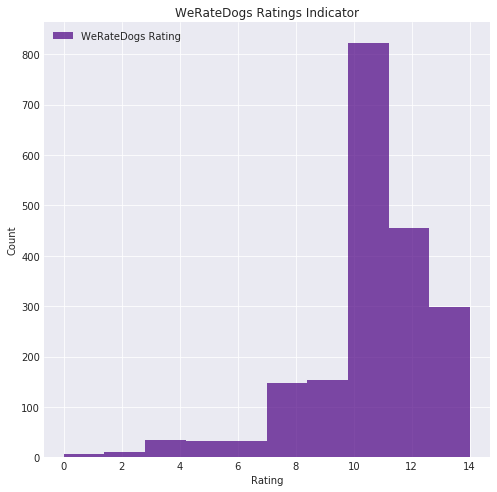

In [173]:
#It seems that WeRateDogs have high ratings for the dogs (positive)
plt.subplots(figsize=(8,8)) ;
legend=["WeRateDogs Rating"]
ratings_count.rating_numerator.plot.hist(alpha=0.7,color='indigo');
plt.title('WeRateDogs Ratings Indicator')
plt.xlabel('Rating');
plt.ylabel('Count');
plt.legend(legend);


### Q2: Which Dog Stage Is the most common ?

In [174]:
dogs_info.groupby('dog_stage').rating_numerator.median()

dog_stage
doggo              12.0
doggo - floofer    11.0
doggo - pupper     12.0
doggo - puppo      13.0
floofer            12.0
pupper             11.0
puppo              12.0
Name: rating_numerator, dtype: float64

In [175]:
stages = dogs_info.dog_stage.value_counts()

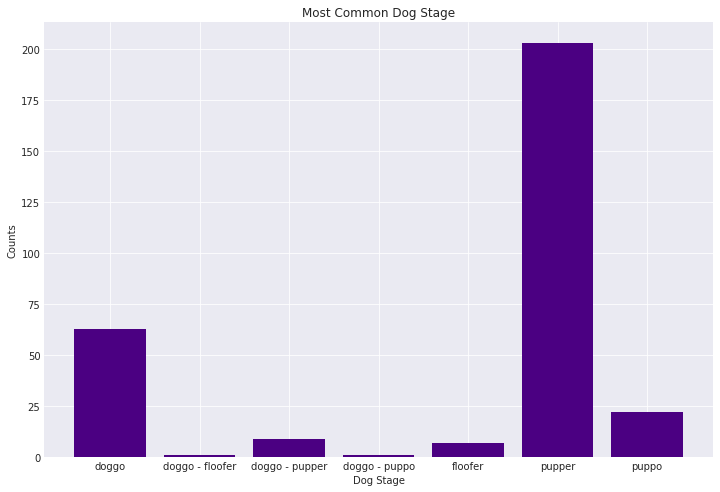

In [176]:
plt.subplots(figsize=(12,8))
plt.bar(stages.index,stages,color='indigo');
plt.title("Most common dog stage".title());
plt.xlabel("dog stage".title());
plt.ylabel("counts".title());

### Q3 : Does the Retweet Counts Correlates well with the WeRateDogs Ratings ?

In [177]:
q3_query = dogs_info.query("rating_numerator < 100 ")

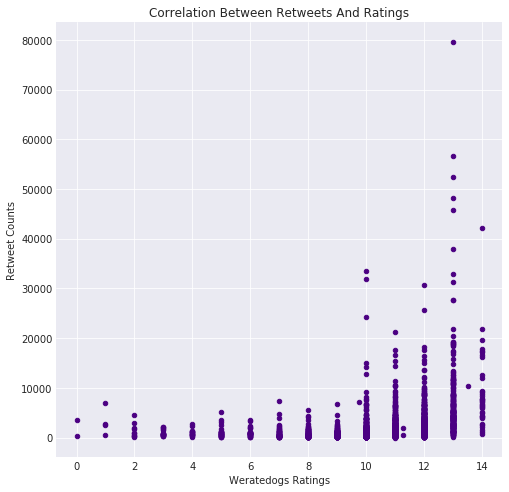

In [178]:
#It seems that people have the same taste as WeRateDogs 
q3_query.plot.scatter(x="rating_numerator", y="retweet_count",figsize=(8,8),color='indigo');
plt.title("Correlation between retweets and ratings".title());
plt.xlabel("WeRateDogs Ratings".title());
plt.ylabel("Retweet counts".title());

### Q4 : Which are the most common breeds and what are their ratings ?

In [179]:
breed_counts = dogs_info.breed.value_counts()

In [180]:
#The top 5 breeds
breed_counts = breed_counts[0:5]
breed_counts

golden_retriever      138
Labrador_retriever    95 
Pembroke              88 
Chihuahua             79 
pug                   54 
Name: breed, dtype: int64

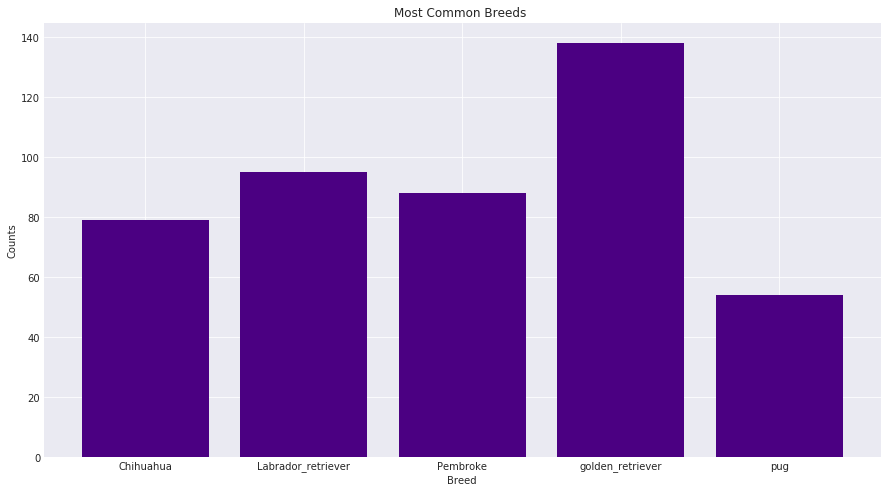

In [181]:
#The most common breed is Golden retriever
plt.subplots(figsize=(15,8))
plt.bar(breed_counts.index,breed_counts,color='indigo' );
plt.title("Most common breeds ".title());
plt.xlabel("breed".title());
plt.ylabel("counts".title());

### Q5 : Is the golden retriever breed recieve high ratings and retweets ?

In [182]:
gold_breed = dogs_info.query("breed == 'golden_retriever' ")[["retweet_count","rating_numerator"]]
gold_breed

,retweet_count,rating_numerator
14,2321.0,13.0
16,4709.0,12.0
17,4559.0,13.0
39,10407.0,13.5
41,6949.0,13.0
45,12118.0,13.0
53,6546.0,12.0
70,2511.0,13.0
93,27680.0,13.0
110,6008.0,13.0


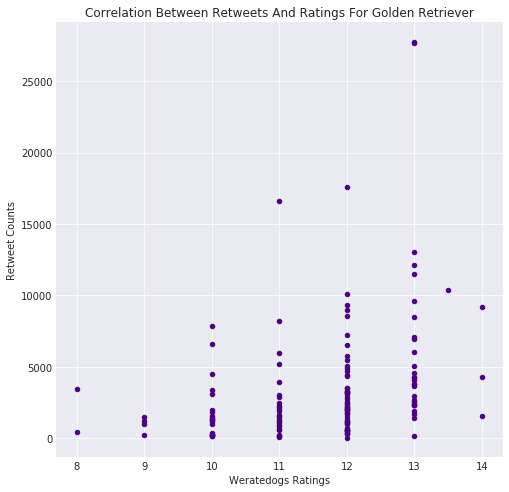

In [183]:
#This scatter plot shows how much golden retriever is liked by fans and WeRateDogs
gold_breed.plot.scatter(x="rating_numerator", y="retweet_count",figsize=(8,8),color='indigo');
plt.title("Correlation between retweets and ratings for golden retriever".title());
plt.xlabel("WeRateDogs Ratings".title());
plt.ylabel("Retweet counts".title());

### Q6 : So ....  Does the pupper stage recieve high ratings and retweets also ?

In [184]:
pupper_stage = dogs_info.query("dog_stage == 'pupper' ")[["retweet_count","rating_numerator"]]

In [185]:
pupper_stage

,retweet_count,rating_numerator
28,3316.0,12.0
43,5134.0,12.0
49,16570.0,14.0
69,3506.0,12.0
76,4308.0,13.0
80,1667.0,12.0
88,3678.0,12.0
108,32883.0,13.0
153,8285.0,14.0
170,5459.0,12.0


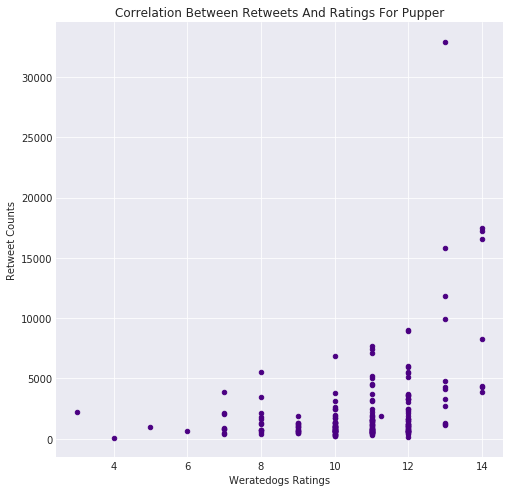

In [186]:
#Pupper stage looks so much liked
pupper_stage.plot.scatter(x="rating_numerator", y="retweet_count",figsize=(8,8),color='indigo');
plt.title("Correlation between retweets and ratings for pupper".title());
plt.xlabel("WeRateDogs Ratings".title());
plt.ylabel("Retweet counts".title());

### Q7 : So does Golden retrievers represent a high percentage of puppers ?

In [187]:
pupper_golden = dogs_info.query("dog_stage == 'pupper' and breed == 'golden_retriever' ")
pupper_golden.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,tweet_link,dog_stage,retweet_count,favorite_count,jpg_url,img_num,breed,confidence_per
220,837820167694528512,2017-03-04 00:21:08,Twitter_for_iPhone,"Here's a pupper before and after being asked ""who's a good girl?"" Unsure as h*ck. 12/10 hint hint it's you","https://twitter.com/dog_rates/status/837820167694528512/photo/1,https://twitter.com/dog_rates/status/837820167694528512/photo/1",12.0,10.0,NaN,https://t.co/ORiK6jlgdH,pupper,8952.0,37277.0,https://pbs.twimg.com/media/C6CI_jbVAAA3-a1.jpg,1,golden_retriever,0.887625
398,807621403335917568,2016-12-10 16:22:02,Twitter_for_iPhone,This is Ollie Vue. He was a 3 legged pupper on a mission to overcome everything. This is very hard to write. 14/10 we will miss you Ollie,"https://twitter.com/dog_rates/status/807621403335917568/photo/1,https://twitter.com/dog_rates/status/807621403335917568/photo/1,https://twitter.com/dog_rates/status/807621403335917568/photo/1,https://twitter.com/dog_rates/status/807621403335917568/photo/1",14.0,10.0,Ollie,https://t.co/qTRY2qX9y4,pupper,4288.0,16236.0,https://pbs.twimg.com/media/CzU_YVGUUAA3Xsd.jpg,3,golden_retriever,0.873233
622,765371061932261376,2016-08-16 02:14:15,Twitter_for_iPhone,This is Louie. He's had a long day. Did a lot of pupper things. Also appears to be rather heckin pettable. 11/10,"https://twitter.com/dog_rates/status/765371061932261376/photo/1,https://twitter.com/dog_rates/status/765371061932261376/photo/1",11.0,10.0,Louie,https://t.co/w2qDmoTIZ5,pupper,2475.0,7842.0,https://pbs.twimg.com/media/Cp8k6oRWcAUL78U.jpg,2,golden_retriever,0.829456
673,756939218950160384,2016-07-23 19:49:07,Twitter_for_iPhone,This is Jax. He is a majestic mountain pupper. Thinks flat ground is for the weak. 12/10 would totally hike with,https://twitter.com/dog_rates/status/756939218950160384/photo/1,12.0,10.0,Jax,https://t.co/KGdeHuFJnH,pupper,2295.0,7342.0,https://pbs.twimg.com/media/CoEwMXeWEAAaIz5.jpg,1,golden_retriever,0.790371
705,751456908746354688,2016-07-08 16:44:23,Twitter_for_iPhone,Here's a pupper that's very hungry but too lazy to get up and eat. 12/10 (vid by @RealDavidCortes),https://twitter.com/dog_rates/status/751456908746354688/video/1,12.0,10.0,NaN,https://t.co/lsVAMBq6ex,pupper,1127.0,3516.0,https://pbs.twimg.com/ext_tw_video_thumb/751456786360725504/pu/img/hWqfIQ29A0cBv6f_.jpg,1,golden_retriever,0.714409


In [188]:
#only puppers and golden retrievers here
sum_pupgld = pupper_golden.breed.count()
sum_pupgld

16

In [189]:
#total puppers
sum_pup = dogs_info.query("dog_stage == 'pupper'")
sum_pup.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,tweet_link,dog_stage,retweet_count,favorite_count,jpg_url,img_num,breed,confidence_per
28,886366144734445568,2017-07-15 23:25:31,Twitter_for_iPhone,This is Roscoe. Another pupper fallen victim to spontaneous tongue ejections. Get the BlepiPen immediate. 12/10 deep breaths Roscoe,"https://twitter.com/dog_rates/status/886366144734445568/photo/1,https://twitter.com/dog_rates/status/886366144734445568/photo/1",12.0,10.0,Roscoe,https://t.co/RGE08MIJox,pupper,3316.0,21524.0,https://pbs.twimg.com/media/DE0BTnQUwAApKEH.jpg,1,French_bulldog,0.999201
43,882762694511734784,2017-07-06 00:46:41,Twitter_for_iPhone,This is Gus. He's quite the cheeky pupper. Already perfected the disinterested wink. 12/10 would let steal my girl,https://twitter.com/dog_rates/status/882762694511734784/photo/1,12.0,10.0,Gus,https://t.co/D43I96SlVu,pupper,5134.0,28903.0,https://pbs.twimg.com/media/DEAz_HHXsAA-p_z.jpg,1,Labrador_retriever,0.850050
49,881536004380872706,2017-07-02 15:32:16,Twitter_for_iPhone,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow),https://twitter.com/dog_rates/status/881536004380872706/video/1,14.0,10.0,NaN,https://t.co/ghXBIIeQZF,pupper,16570.0,50199.0,https://pbs.twimg.com/ext_tw_video_thumb/881535971568889856/pu/img/9bawiZ--8FKywTkz.jpg,1,Samoyed,0.281463
69,876838120628539392,2017-06-19 16:24:33,Twitter_for_iPhone,This is Ginger. She's having a ruff Monday. Too many pupper things going on. H*ckin exhausting. 12/10 would snug passionately,"https://twitter.com/dog_rates/status/876838120628539392/photo/1,https://twitter.com/dog_rates/status/876838120628539392/photo/1",12.0,10.0,Ginger,https://t.co/j211oCDRs6,pupper,3506.0,21125.0,https://pbs.twimg.com/media/DCsnnZsVwAEfkyi.jpg,1,bloodhound,0.575751
76,874296783580663808,2017-06-12 16:06:11,Twitter_for_iPhone,This is Jed. He may be the fanciest pupper in the game right now. Knows it too. 13/10 would sign modeling contract,https://twitter.com/dog_rates/status/874296783580663808/photo/1,13.0,10.0,Jed,https://t.co/0YplNnSMEm,pupper,4308.0,26651.0,https://pbs.twimg.com/media/DCIgSR0XgAANEOY.jpg,1,cocker_spaniel,0.437216


In [190]:
sum_pup = sum_pup.breed.count()
sum_pup

144

In [191]:
dogs_info.query("dog_stage == 'pupper'").breed.value_counts()

golden_retriever                  16
Pembroke                          10
pug                               8 
Labrador_retriever                8 
Chihuahua                         6 
Pomeranian                        6 
Lakeland_terrier                  5 
toy_poodle                        5 
Samoyed                           4 
French_bulldog                    3 
papillon                          3 
German_shepherd                   3 
Shetland_sheepdog                 3 
cocker_spaniel                    3 
Border_collie                     3 
kuvasz                            2 
boxer                             2 
kelpie                            2 
miniature_pinscher                2 
malamute                          2 
Siberian_husky                    2 
bloodhound                        2 
Bernese_mountain_dog              2 
Maltese_dog                       2 
American_Staffordshire_terrier    2 
Staffordshire_bullterrier         1 
Tibetan_mastiff                   1 
G

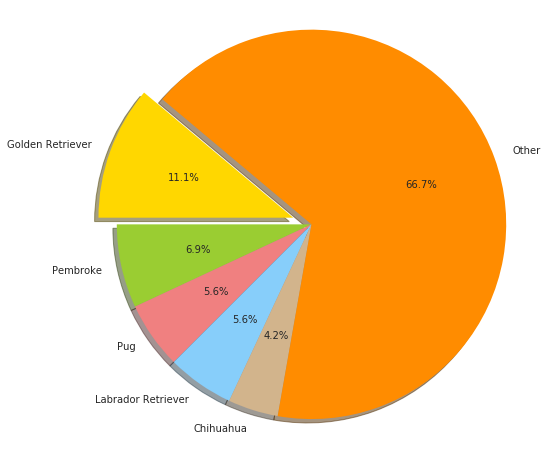

In [192]:
#Yes it represents the bigges stake of the pupper stage
# Data to plot
labels = 'Golden Retriever', 'Pembroke', 'Pug', 'Labrador Retriever','Chihuahua','Other'
sizes = [16, 10, 8, 8,6,144-16-10-8-8-6]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','tan','darkorange']
explode = (0.1, 0, 0, 0,0,0)  # explode 1st slice

# Plot
plt.subplots(figsize=(8,8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

# The most liked golden retriever pupper

In [193]:
#Finding only puppers and golden retriever first
pupper_golden_liked = dogs_info.query("dog_stage == 'pupper' and breed == 'golden_retriever' ")
#Filtering first by maximum rating 14.0 from WeRateDogs
pupper_golden_liked = pupper_golden_liked.query("rating_numerator == '14.0' ")
#Filtering Second by maximum retweets
pupper_golden_liked.retweet_count.max()

4288.0

In [194]:
pupper_golden_liked.query("retweet_count == '4288.0'")

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,tweet_link,dog_stage,retweet_count,favorite_count,jpg_url,img_num,breed,confidence_per
398,807621403335917568,2016-12-10 16:22:02,Twitter_for_iPhone,This is Ollie Vue. He was a 3 legged pupper on a mission to overcome everything. This is very hard to write. 14/10 we will miss you Ollie,"https://twitter.com/dog_rates/status/807621403335917568/photo/1,https://twitter.com/dog_rates/status/807621403335917568/photo/1,https://twitter.com/dog_rates/status/807621403335917568/photo/1,https://twitter.com/dog_rates/status/807621403335917568/photo/1",14.0,10.0,Ollie,https://t.co/qTRY2qX9y4,pupper,4288.0,16236.0,https://pbs.twimg.com/media/CzU_YVGUUAA3Xsd.jpg,3,golden_retriever,0.873233


In [195]:
#found how to get here https://cutt.ly/Rh8Ay3E
import shutil
#Let's get that pupper with index 398
golden_pupper_url = pupper_golden_liked.jpg_url[398]
r = requests.get(golden_pupper_url, stream=True)
local_file = open('golden_pupper.jpg', 'wb')
r.raw.decode_content = True
shutil.copyfileobj(r.raw, local_file)
del r

In [196]:
#found how to open an image in jupyter from here https://cutt.ly/ch8AOsZ
from IPython.display import Image
Image(filename='golden_pupper.jpg')

# Who are the top 2 contenders out there ?

In [197]:
#1720 Rating
#420 Rating
first_cont = dogs_info.query("rating_numerator > 100 ")
first_cont

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,tweet_link,dog_stage,retweet_count,favorite_count,jpg_url,img_num,breed,confidence_per
725,749981277374128128,2016-07-04 15:00:45,TweetDeck,This is Atticus. He's quite simply America af. 1776/10,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776.0,10.0,Atticus,https://t.co/GRXwMxLBkh,NaN,2772.0,5569.0,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1,NaN,NaN
1717,670842764863651840,2015-11-29 05:52:33,Twitter_for_iPhone,After so many requests... here you go.\n\nGood dogg. 420/10,https://twitter.com/dog_rates/status/670842764863651840/photo/1,420.0,10.0,Snoop Dogg,https://t.co/yfAAo1gdeY,NaN,4324.0,7989.0,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,1,NaN,NaN


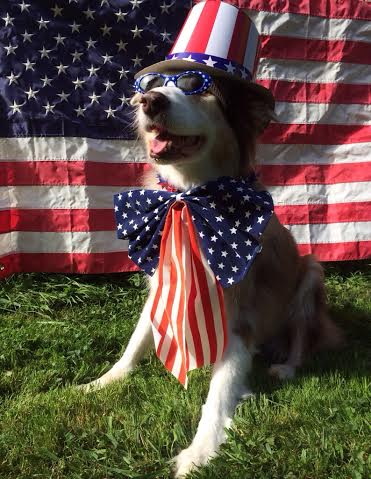

In [198]:
# the First one with 1776 rating index 725
first_cont_url = dogs_info.jpg_url[725]
r = requests.get(first_cont_url, stream=True)
local_file = open('first_cont.jpg', 'wb')
r.raw.decode_content = True
shutil.copyfileobj(r.raw, local_file)
del r
Image(filename='first_cont.jpg')

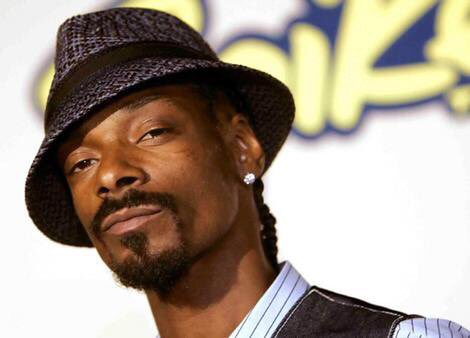

In [199]:
# the Second one with 420 rating index 1717
second_cont_url = dogs_info.jpg_url[1717]
r = requests.get(second_cont_url, stream=True)
local_file = open('second_cont.jpg', 'wb')
r.raw.decode_content = True
shutil.copyfileobj(r.raw, local_file)
del r
Image(filename='second_cont.jpg')

# The last two contenders ?

In [200]:
last_cont = dogs_info.query("rating_numerator == 0 ")
last_cont

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,tweet_link,dog_stage,retweet_count,favorite_count,jpg_url,img_num,breed,confidence_per
235,835152434251116546,2017-02-24 15:40:31,Twitter_for_iPhone,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10,"https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1",0.0,10.0,NaN,https://t.co/YbEJPkg4Ag,NaN,3443.0,24574.0,https://pbs.twimg.com/media/C5cOtWVWMAEjO5p.jpg,3,NaN,NaN
755,746906459439529985,2016-06-26 03:22:31,Twitter_for_iPhone,"PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment",https://twitter.com/dog_rates/status/746906459439529985/photo/1,0.0,10.0,NaN,https://t.co/c7WXaB2nqX,NaN,336.0,3168.0,https://pbs.twimg.com/media/Cl2LdofXEAATl7x.jpg,1,NaN,NaN


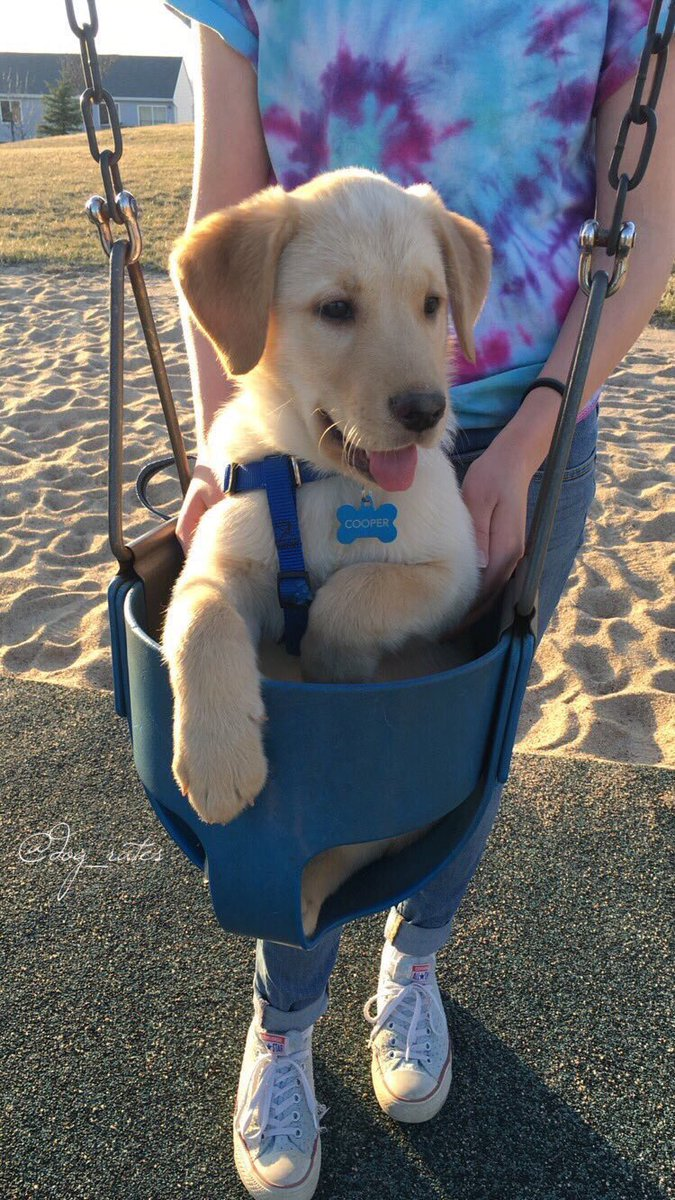

In [201]:
# the first version last contenders one with 0 rating index 235
last1_cont_url = dogs_info.jpg_url[235]
r = requests.get(last1_cont_url, stream=True)
local_file = open('last1_cont.jpg', 'wb')
r.raw.decode_content = True
shutil.copyfileobj(r.raw, local_file)
del r
Image(filename='last1_cont.jpg')

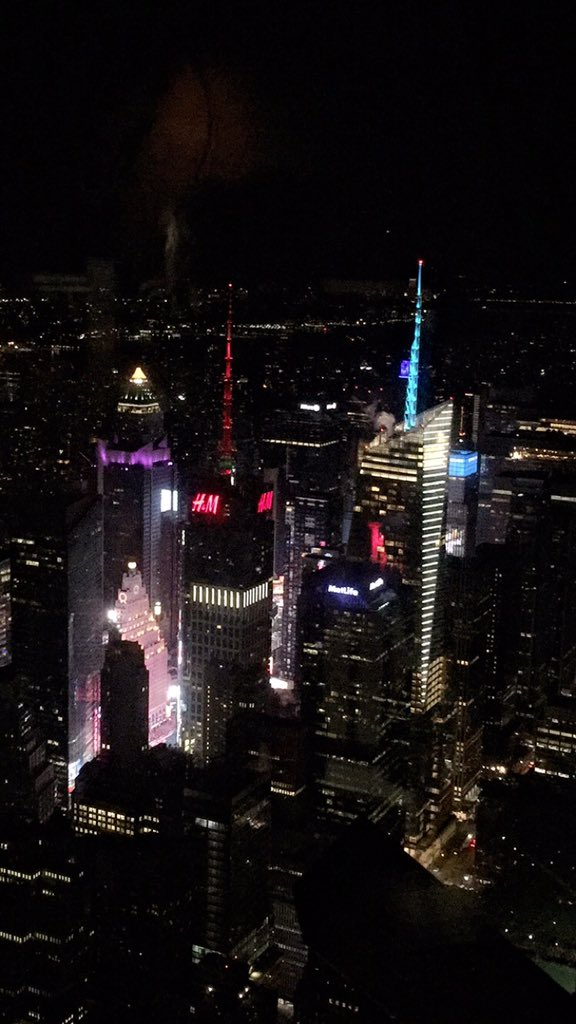

In [202]:
# the second version last contenders one with 0 rating index 755
last2_cont_url = dogs_info.jpg_url[755]
r = requests.get(last2_cont_url, stream=True)
local_file = open('last2_cont.jpg', 'wb')
r.raw.decode_content = True
shutil.copyfileobj(r.raw, local_file)
del r
Image(filename='last2_cont.jpg')